In [11]:
# Import from Qiskit
from qiskit import BasicAer , Aer , IBMQ
from qiskit.circuit.library import RealAmplitudes, EfficientSU2, TwoLocal, ExcitationPreserving
from qiskit.utils import QuantumInstance

from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP, SPSA
from qiskit.opflow import Z2Symmetries
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
#from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.algorithms import VQE, NumPyEigensolver, NumPyMinimumEigensolver
from qiskit_nature.operators.second_quantization import FermionicOp
from qiskit_nature.drivers import UnitsType
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.circuit.library import UCCSD, HartreeFock
from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem
from qiskit_nature.settings import settings
from qiskit_nature.mappers.second_quantization import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

# Import from other python libraries
import numpy as np
import matplotlib . pyplot as plt
import pylab as py

In [12]:
basis = 'sto3g'
driver = PySCFDriver(atom = 'O 0.0 0.0 0.0; H 0.757 0.586 0.0; H -0.757 0.586 0.0',
                     unit = UnitsType.ANGSTROM,
                     charge = 0, spin = 0, basis = basis)

molecule = driver.run()

print("=" * 20)

problem = ElectronicStructureProblem(driver)
second_q_ops = problem.second_q_ops()

FermionicOp.set_truncation(0)
main_op = second_q_ops['ElectronicEnergy']

print(main_op)

Fermionic Operator
register length=14, number terms=3150
  -32.70313595537685 * ( +_0 -_0 )
+ 0.5580936712152328 * ( +_0 -_1 )
+ -0.23520942427787317 * ( +_0 -_3 )
+ 0.3048033604768666 * ( +_0 -_5 )
+ 0.5580936712152349 * ( +_1 -_0 )
+ -7.671205435641991 * ( +_1 -_1 )
+ 0.43122992377249136 * ( +_1 -_3 )
+ -1.3818822921338954 * ( +_1 -_5 )
+ -6.365144017120199 * ( +_2 -_2 )
+ -1.709855827247815 * ( +_2 -_6 )
+ -0.23520942427787392 * ( +_3 -_0 )
+ 0.43122992377249086 * ( +_3 -_1 )
+ -6.987578559770143 * ( +_3 -_3 )
+ -1.0792894461946518 * ( +_3 -_5 )
+ -7.457567275062591 * ( +_4 -_4 )
+ 0.3048033604768681 * ( +_5 -_0 )
+ -1.3818822921338951 * ( +_5 -_1 )
+ -1.079289446194652 * ( +_5 -_3 )
+ -5.3358299267050935 * ( +_5 -_5 )
+ -1.7098558272478153 * ( +_6 -_2 )
+ -5.60386653088923 * ( +_6 -_6 )
+ -32.70313595537685 * ( +_7 -_7 )
+ 0.5580936712152328 * ( +_7 -_8 )
+ -0.23520942427787317 * ( +_7 -_10 )
+ 0.3048033604768666 * ( +_7 -_12 )
+ 0.5580936712152349 * ( +_8 -_7 )
+ -7.67120543564199

In [13]:
basis ='sto3g '
#basis ='4-31G'
#사용할 환경을 결정한다.
# Simulators
SV = " statevector "
QA = " qasm "
AS = " aer"

# Optimizers
CO = " COBYLA "
BF = " L_BFGS_B "
SL = " SLSQP "
SP = " SPSA "

# Quantum Instances for running the quantum circuit
quantum_instances = {
SV: QuantumInstance ( backend = Aer . get_backend ('statevector_simulator')),
QA: QuantumInstance ( backend = Aer. get_backend ('qasm_simulator')),
AS: QuantumInstance ( backend = Aer. get_backend ('aer_simulator'))}

# Classical Optimizers for parameter minimization
#최대 작업수
MAX_ITER = 250
optimizers = {
#CO잘됨
CO: COBYLA ( maxiter = MAX_ITER ),
#BF 잘안됨
BF: L_BFGS_B ( maxiter = MAX_ITER ),
#SL 잘안됨
SL: SLSQP ( maxiter = MAX_ITER ),
#SP 잘됨
SP: SPSA ( maxiter = MAX_ITER) }
# Quantum simulator
quantum_instance = quantum_instances [SV]
# Classical optimizer .
optimizer = optimizers [CO]

intermediate_info = {
'nfev ': [],
'parameters ': [],
'energy ': [],
'stddev ': []
}
#각 iteration에서 정보를 저장하는 함수
def callback (nfev , parameters , energy , stddev ):
    intermediate_info ['nfev ']. append ( nfev )
    intermediate_info ['parameters ']. append ( parameters )
    intermediate_info ['energy ']. append ( energy )
    intermediate_info ['stddev ']. append ( stddev )
    
d_arr =[]
e_arr =[]
t0_arr = []
t1_arr = []
t2_arr = []
exact_arr = []
repulsive_arr = []
qoulomb_arr = []

def exact_solver(qubit_op, problem):
    sol = NumPyMinimumEigensolver().compute_minimum_eigenvalue(qubit_op)
    result = problem.interpret(sol)
    return result


/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  app.launch_new_instance()
/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.


/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated 

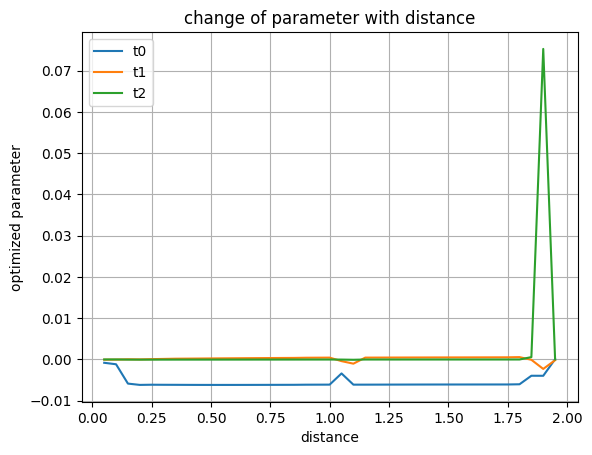

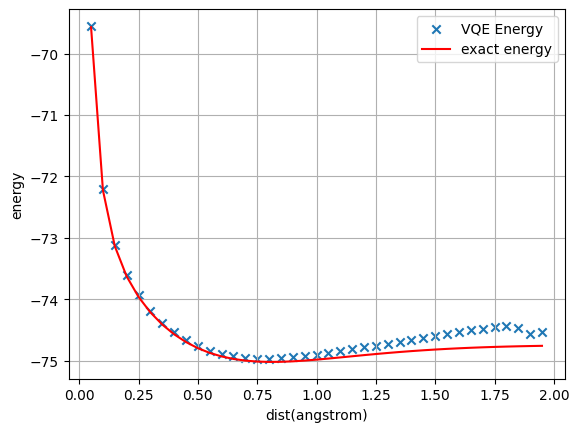

In [14]:
distance = np.arange(0.05,2,0.05)
mapper = JordanWignerMapper()
converter = QubitConverter(mapper=mapper, two_qubit_reduction=True)
freeze_core=True
t0_arr = []
t1_arr = []
t2_arr = []

for dist in distance:
    driver = PySCFDriver(atom = "O 0.0 0.0 0.0; H " + str(dist) + " 0.586 0.0;" + "H -" + str(dist) + " 0.586 0.0",
                     unit = UnitsType.ANGSTROM,
                     charge = 0, spin = 0, basis = basis)
    settings.dict_aux_operators = True

    problem = ElectronicStructureProblem(driver)
    second_q_ops = problem.second_q_ops()
    FermionicOp.set_truncation(0)
    main_op = second_q_ops['ElectronicEnergy']

    particle_number = problem.grouped_property_transformed.get_property("ParticleNumber")
    num_particles = (particle_number.num_alpha, particle_number.num_beta)
    num_orbitals = particle_number.num_spin_orbitals
    qubitOp = converter.convert(main_op, num_particles=num_particles,)

    init_state = HartreeFock(num_orbitals, num_particles, converter)
    ansatz = UCCSD(qubit_converter=converter, num_particles=num_particles, num_spin_orbitals=num_orbitals, initial_state=init_state)
    vqe = VQE(ansatz , optimizer , callback = callback, quantum_instance = quantum_instance )


    result = vqe.compute_minimum_eigenvalue(qubitOp)
    electronic_structure_result = problem.interpret(result)
    #핵 간의 밀어내는 에너지를 얻어낸다. (이는 전자의 구조에 의해 변하지 않는 일정한 값이다.)
    shift = electronic_structure_result.nuclear_repulsion_energy
    #최종 에너지 계산값
    vqe_result = result.eigenvalue.real #+shift
    qoulomb = vqe_result
    repulsion = shift
    energy = qoulomb + repulsion
    exact_energy = exact_solver(qubitOp, problem).total_energies[0].real
    qoulomb_arr.append(qoulomb)
    repulsive_arr.append(repulsion)
    d_arr.append(dist)
    e_arr.append(energy)
    exact_arr.append(exact_energy)

    p1 = intermediate_info['parameters '][-1][0]
    p2 = intermediate_info['parameters '][-1][1]
    p3 = intermediate_info['parameters '][-1][2]
    t0_arr.append(p1)
    t1_arr.append(p2)
    t2_arr.append(p3)


plt.plot(distance,t0_arr,label='t0')
plt.plot(distance,t1_arr,label='t1')
plt.plot(distance,t2_arr,label='t2')
plt.xlabel('distance')
plt.ylabel('optimized parameter')
plt.title('change of parameter with distance')
plt.grid()
plt.legend()
plt.show()


#plt.plot(d_arr,qoulomb_arr,label ='vqe_result')
#plt.plot(d_arr,repulsive_arr, label = 'repulsion')
plt.scatter(d_arr,e_arr,marker='x', label = 'VQE Energy')
plt.plot(d_arr,exact_arr,label = 'exact energy',color='red')
plt.grid()
plt.legend()
plt.xlabel("dist(angstrom)")
plt.ylabel('energy')
plt.show()

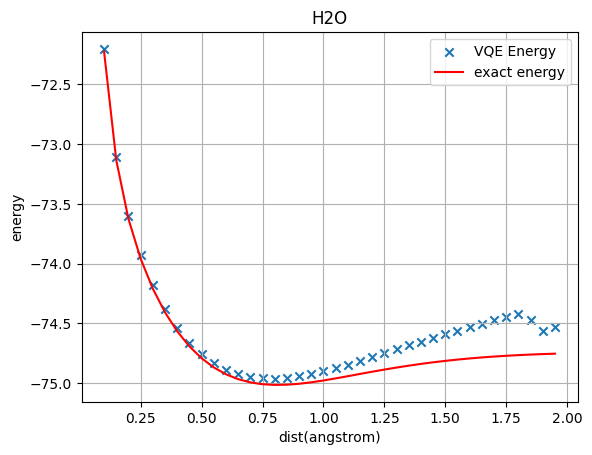

In [15]:
plt.scatter(d_arr[1:],e_arr[1:],marker='x', label = 'VQE Energy')
plt.plot(d_arr[1:],exact_arr[1:],label = 'exact energy',color='red')
plt.title("H2O")
plt.grid()
plt.legend()
plt.xlabel("dist(angstrom)")
plt.ylabel('energy')
plt.show()

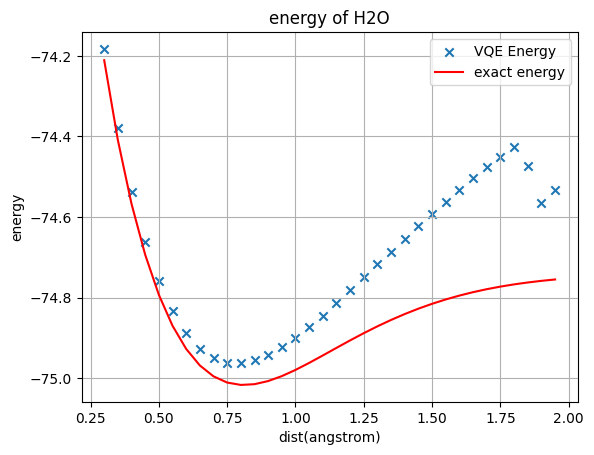

In [16]:
x = d_arr[5:]
y1 = e_arr[5:]
y2 = exact_arr[5:]
plt.scatter(x,y1,marker='x', label = 'VQE Energy')
plt.plot(x,y2,label = 'exact energy',color='red')
plt.grid()
plt.title("energy of H2O")
plt.legend()
plt.xlabel("dist(angstrom)")
plt.ylabel('energy')
plt.show()

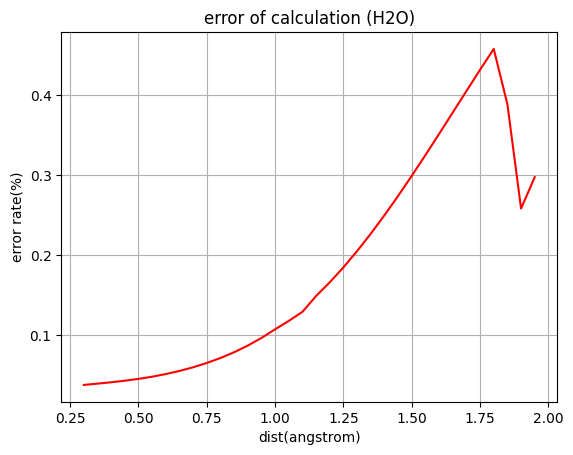

In [17]:
error=[]
for k in np.arange(len(d_arr)):
    err = e_arr[k]-exact_arr[k]
    erro = np.abs(100*err/exact_arr[k])
    error.append(erro)


plt.plot(d_arr[5:],error[5:],color='red')
plt.title("error of calculation (H2O)")
plt.grid()
plt.xlabel("dist(angstrom)")
plt.ylabel('error rate(%)')
plt.show()

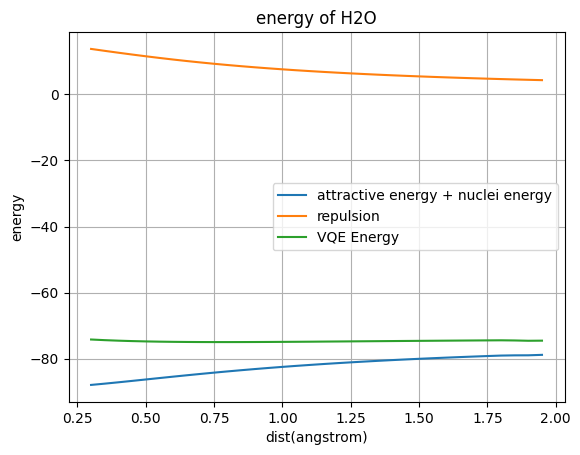

In [18]:
plt.plot(d_arr[5:],qoulomb_arr[5:],label ='attractive energy + nuclei energy')
plt.plot(d_arr[5:],repulsive_arr[5:], label = 'repulsion')
plt.plot(d_arr[5:],e_arr[5:], label = 'VQE Energy')

plt.grid()
plt.legend()
plt.title('energy of H2O')
plt.xlabel("dist(angstrom)")
plt.ylabel('energy')
plt.show()

In [19]:
print(len(intermediate_info['parameters '][0]))

140


In [20]:
12000/92

130.43478260869566